# PCA: PRINCIPAL COMPONENT ANALYSIS

In [1]:
# It is a linear transformation technique.
# PCA is an unsupervised dimensionality reduction technique.[can be applied labeled as well as unlabeled data]
# PCA tries to find the orthogonal axes/vectors(PCs) of maximum variance in a dataset.[orthogonal=>linearly independent]
# The PC which has the maximum variance captured is called the Dominant Principal Component[PC1 retains max. variance(info)]
# AIM: to find highly correlated or duplicate features,
# and to come up with a new feature set where there is minimum correlation between the features,
# OR In other words, feature set with maximum variance between the features. 
# Since the variance between the features doesn't depend upon the output,
# therefore PCA doesn't take the output labels into account(Unsupervised).
# PCA works only on numerical data.
# It is a feature combination technique,not feature selection, 
# Because each PC is a weighted additive combination of all the columns in the original dataset.
# Also used to Visualise Classes, apart from Reducing Dimensions,
# With the first two PCs itself, it’s usually possible to see a clear separation of classes/clusters.
# Eigenvectors are Principal component directions and eigenvalues are magnitude of variance along those directions.

In [2]:
# PCA STEPS:
# 1. Normalize the data
# 2. Calculate the covariance matrix of data points.
# 3. Calculate eigen vectors and eigen values.
# 4. Sort the eigen vectors according to their eigen values in decreasing order.
# 5. Choose first k eigen vectors and that will be the new k dimensions.
# 6. Transform the original n dimensional data points into k dimensions.

## PCA FOR 2 FEATURES AND 3 CLASSES

## Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
import seaborn as sns
import pylab as pl

## Loading Iris Dataset

In [4]:
iris = datasets.load_iris()

## Extracting the first two features: Sepal_length & Sepal_width

In [5]:
x = iris.data[:, :2] #instances
y= iris.target #class labels of instances

## Standardizing features by removing the mean and scaling to unit variance

In [6]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x)

## Calculating covariance matrix 

In [7]:
x_covariance_matrix = np.cov(x_std.T)

In [8]:
# If we have a dataset with n features, then we have the corresponding n eigenvalues and eigenvectors
print(x_covariance_matrix)

[[ 1.00671141 -0.11835884]
 [-0.11835884  1.00671141]]


## Calculating the eigenvalues and eigenvectors

In [9]:
e_values, e_vectors = np.linalg.eig(x_covariance_matrix)
print(e_values)
print(e_vectors)

[1.12507025 0.88835257]
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
e_pairs = [(np.abs(e_values[i]), e_vectors[:,i]) for i in range(len(e_values))]

## Sorting the Eigen vectors according to their Eigen values in decreasing order

In [11]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
e_pairs.sort(key=lambda x: x[0], reverse=True)

# Printing sorted Eigen Values with corresponding Eigen Vectors
for i in range(len(e_values)):
    print("Eigenvalue and eigenvector: "+str(i + 1))
    print(e_pairs[i])
    print("\n")

Eigenvalue and eigenvector: 1
(1.125070252482887, array([ 0.70710678, -0.70710678]))


Eigenvalue and eigenvector: 2
(0.8883525663090575, array([0.70710678, 0.70710678]))




In [12]:
# It turns out that the eigenvector corresponding to the highest eigenvalue is the PC of the dataset,
# and it is our call as to how many eigenvalues we choose to proceed our analysis with.
# To reduce the dimensions, we choose the first p eigenvalues and ignore the rest. 
# We do lose out some information in the process, but if the eigenvalues are small, we do not lose much.

## Calculating the Variance Captured by each PC

In [13]:
total_sum = sum(e_values)
variances = []
count = 0

for i in sorted(e_values, reverse=True):
    count = count + 1
    variances.append(i / total_sum)
    print("Variance captured by PC"+ str(count) + " is " + str((i / total_sum)*100))
    

Variance captured by PC1 is 55.87848920665011
Variance captured by PC2 is 44.12151079334989


In [14]:
# PC1 captures more variance(~56%) than PC2.

## Scatter Plot of the original dataset having 2 features and 3 classes

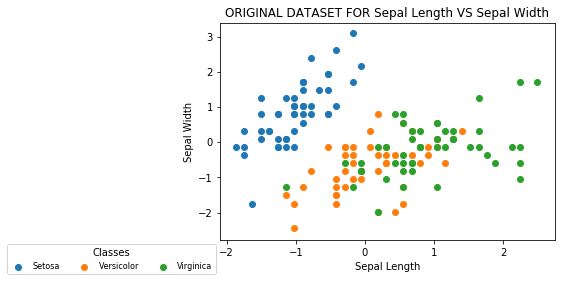

In [15]:
# plot 

plt.scatter(x_std[0:49,0], x_std[0:49,1], label='Setosa')
plt.scatter(x_std[50:99,0], x_std[50:99,1], label='Versicolor')
plt.scatter(x_std[100:149, 0], x_std[100:149,1], label='Virginica')
plt.legend(numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), title="Classes")
plt.title("ORIGINAL DATASET FOR Sepal Length VS Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

## Scatter Plot of the original dataset showing the direction of PC1 and PC2

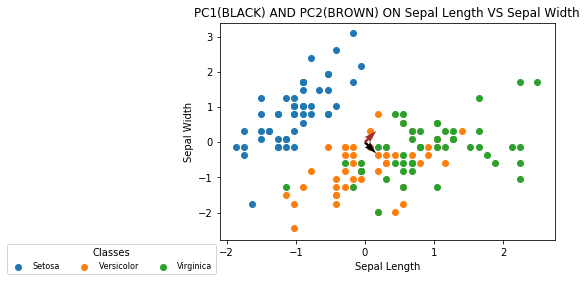

In [16]:
plt.scatter(x_std[0:49,0], x_std[0:49,1], label='Setosa')
plt.scatter(x_std[50:99,0], x_std[50:99,1], label='Versicolor')
plt.scatter(x_std[100:149, 0], x_std[100:149,1], label='Virginica')
plt.legend(numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), title="Classes")
plt.title("PC1(BLACK) AND PC2(BROWN) ON Sepal Length VS Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
origin=[0,0]
plt.quiver(*origin,*e_vectors.T[0],color=['black'],scale=21) #PC1=BLACK
plt.quiver(*origin,*e_vectors.T[1],color=['brown'],scale=21) #PC2=BROWN
plt.show()

## Projecting all the datapoints onto eigen vector with highest eigen value / PC1

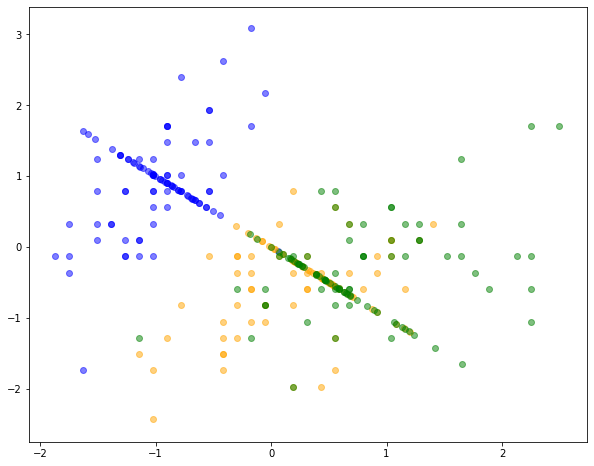

In [17]:
v=e_vectors.T[0]
colors = ['blue', 'orange', 'green']
fig, ax = plt.subplots(figsize=(10, 8))
for point, pred in zip(x_std, y):
    ax.scatter(point[0], point[1], color=colors[pred],alpha=0.5)
    proj = (np.dot(point, v) * v) / np.dot(v.T, v)
 
    ax.scatter(proj[0], proj[1], color=colors[pred],alpha=0.5)
    
 
plt.show()

## 2D to 1D DIMENSIONALITY REDUCTION USING PC1

In [18]:
# new projection is a dot product
projected_x1 = x_std.dot(e_vectors.T[0].reshape(2,1)) 

In [19]:
result = pd.DataFrame(projected_x1, columns=['PC1'])
result['meaningless y-axis'] = 0.0
result['Class'] = y

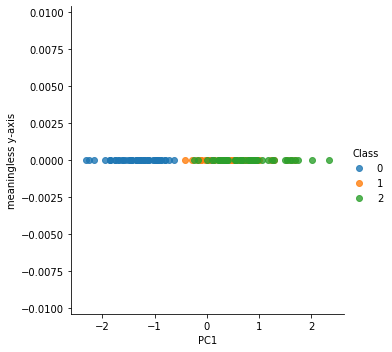

In [20]:
sns.lmplot('PC1', 'meaningless y-axis', data=result, fit_reg=False,hue="Class")  # x-axis, y-axis, data, no line, color

## Projecting all the datapoints onto eigen vector with 2nd highest eigen value / PC2

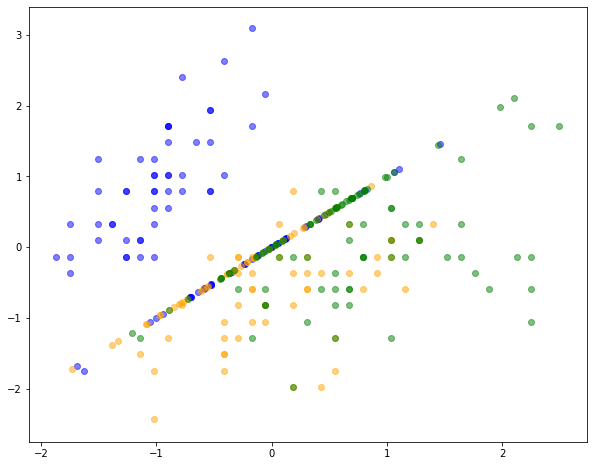

In [21]:
v=e_vectors.T[1]
colors = ['blue', 'orange', 'green']
fig, ax = plt.subplots(figsize=(10, 8))
for point, pred in zip(x_std, y):
    ax.scatter(point[0], point[1], color=colors[pred],alpha=0.5)
    proj = (np.dot(point, v) * v) / np.dot(v.T, v)
 
    ax.scatter(proj[0], proj[1], color=colors[pred],alpha=0.5)
    
 
plt.show()

## 2D to 1D DIMENSIONALITY REDUCTION USING PC2

In [22]:
# new projection is a dot product
projected_x2 = x_std.dot(e_vectors.T[1].reshape(2,1)) 

In [23]:
result = pd.DataFrame(projected_x2, columns=['PC2'])
result['meaningless y-axis'] = 0.0
result['Class'] = y

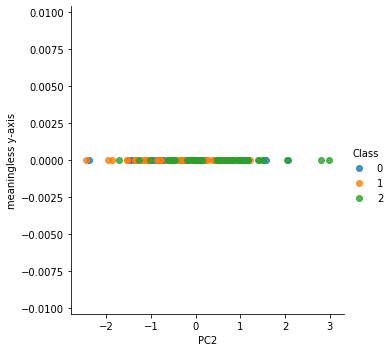

In [24]:
sns.lmplot('PC2', 'meaningless y-axis', data=result, fit_reg=False,hue="Class")  # x-axis, y-axis, data, no line, color

## THUS, WE REDUCED THE 2D DATASET INTO 1D

## Projecting all the datapoints onto BOTH PC1 AND PC2

In [25]:
# new projection is a dot product
projected_x = x_std.dot(e_vectors)

In [26]:
result = pd.DataFrame(projected_x, columns=['PC1','PC2'])
result['Class'] = y

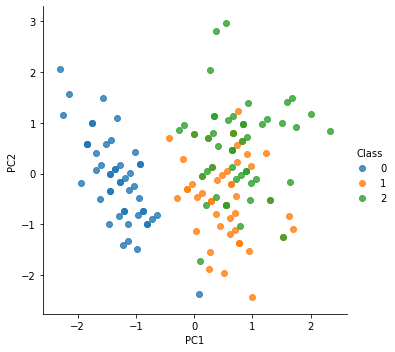

In [27]:
sns.lmplot('PC1', 'PC2', data=result, fit_reg=False,hue="Class")  # x-axis, y-axis, data, no line, color

# LDA: LINEAR DISCRIMINANT ANALYSIS

In [28]:
# It is a linear transformation technique.
# LDA makes assumptions about normally distributed classes and equal class covariances.
# LDA is a supervised dimensionality reduction technique as well as classification technique.
# AIM: project the data points to new direction/axis in a way so as to,
# minimize the variance within the cluster,
# and maximize the distance between the means of the two classes.
# These new dimensions form the linear discriminants of the feature set.
# Unlike PCA, LDA tries to reduce dimensions of the feature set,
# while retaining the information that discriminates output classes(Supervised).
# LD1(1st new axis that LDA creates)captures most variation(min variance within + max dist btwn means)between the classes. 

In [29]:
# LDA STEPS:
# 1. Compute the d-dimensional mean vectors for the different classes from the dataset.
# 2. Compute the scatter matrices (in-between-class and within-class scatter matrix).
# 3. Compute the eigenvectors (ee1,ee2,...,eed) and corresponding eigenvalues (λλ1,λλ2,...,λλd) for the scatter matrices.
# 4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors 
#    with the largest eigenvalues to form a d×k dimensional matrix WW (where every column represents an eigenvector).
# 5. Use this d×k eigenvector matrix to transform the samples onto the new subspace. 
#    This can be summarized by the matrix multiplication: 
#    YY=XX×WW (where XX is a n×d-dimensional matrix representing the n samples, 
#    and yy are the transformed n×k-dimensional samples in the new subspace).

## LDA FOR 2 FEATURES AND 3 CLASSES

## LDA CLASS:

In [30]:
import sklearn
class LDA:
 
    def fit(self, X, y):
        target_classes = np.unique(y)
 
        mean_vectors = []
 
        for cls in target_classes:
            mean_vectors.append(np.mean(X[y == cls], axis=0))

        data_mean = np.mean(X, axis=0).reshape(1, X.shape[1])
        B = np.zeros((X.shape[1], X.shape[1]))
        for i, mean_vec in enumerate(mean_vectors):
            n = X[y == i].shape[0]
            mean_vec = mean_vec.reshape(1, X.shape[1])
            mu1_mu2 = mean_vec - data_mean

            B += n * np.dot(mu1_mu2.T, mu1_mu2)

        s_matrix = []

        for cls, mean in enumerate(mean_vectors):
            Si = np.zeros((X.shape[1], X.shape[1]))
            for row in X[y == cls]:
                t = (row - mean).reshape(1, X.shape[1])
                Si += np.dot(t.T, t)
            s_matrix.append(Si)

        S = np.zeros((X.shape[1], X.shape[1]))
        for s_i in s_matrix:
            S += s_i

        S_inv = np.linalg.inv(S)

        S_inv_B = S_inv.dot(B)

        eig_vals, eig_vecs = np.linalg.eig(S_inv_B)

        idx = eig_vals.argsort()[::-1]

        eig_vals = eig_vals[idx] # Not needed
        eig_vecs = eig_vecs[:, idx]

        return eig_vecs



def load_data(cols, load_all=False, head=False):
            iris = sns.load_dataset("iris")

            if not load_all:
                if head:
                    iris = iris.head(100)
                else:
                    iris = iris.tail(100)

            le = sklearn.preprocessing.LabelEncoder()
            y = le.fit_transform(iris["species"])

            X = iris.drop(["species"], axis=1)

            if len(cols) > 0:
                X = X[cols]

            return X.values, y



## LINEAR DISCRIMINANT IN CASE OF SEPAL_LENGTH VS SEPAL_WIDTH

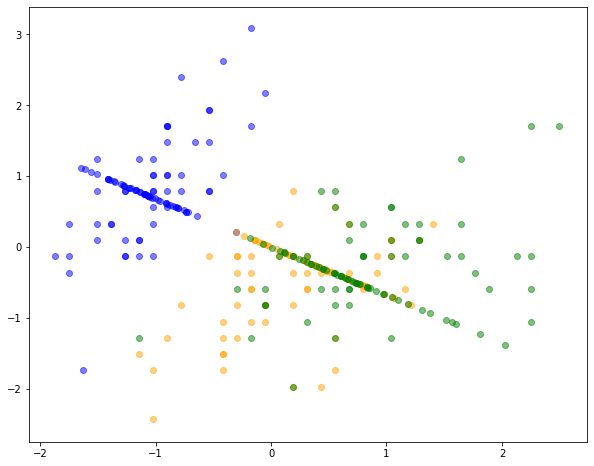

In [31]:
cols = ["sepal_length", "sepal_width"]

X, y = load_data(cols, load_all=True, head=True)
X_std = StandardScaler().fit_transform(X)
lda = LDA()
eig_vecs = lda.fit(X_std, y)
W = eig_vecs[:, :1]
 
colors = ['blue', 'orange', 'green']
fig, ax = plt.subplots(figsize=(10, 8))
for point, pred in zip(X_std, y):
    ax.scatter(point[0], point[1], color=colors[pred],alpha=0.5)
    proj = (np.dot(point, W) * W) / np.dot(W.T, W)
 
    ax.scatter(proj[0], proj[1], color=colors[pred],alpha=0.5)
    
 
plt.show()

## LINEAR DISCRIMINANT IN CASE OF PETAL_LENGTH VS PETAL_WIDTH

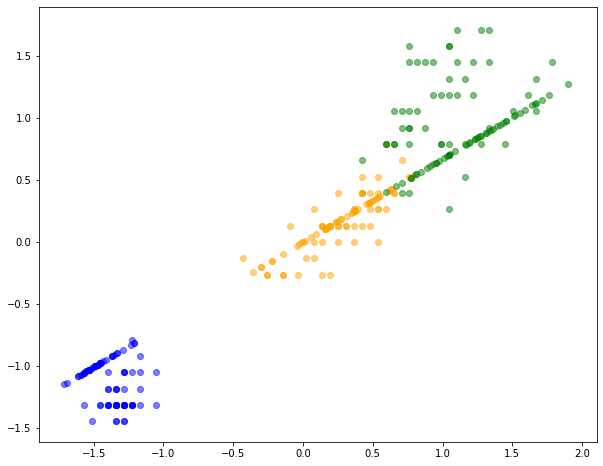

In [32]:
cols = ["petal_length", "petal_width"]
X, y = load_data(cols, load_all=True, head=True)
 
X_std = StandardScaler().fit_transform(X)
lda = LDA()
eig_vecs = lda.fit(X_std, y)
W = eig_vecs[:, :1]
 
colors = ['blue', 'orange', 'green']
fig, ax = plt.subplots(figsize=(10, 8))
for point, pred in zip(X_std, y):
    ax.scatter(point[0], point[1], color=colors[pred],alpha=0.5)
    proj = (np.dot(point, W) * W) / np.dot(W.T, W)
 
    ax.scatter(proj[0], proj[1], color=colors[pred],alpha=0.5)
    
 
plt.show()

## PCA VS LDA 
## [COMPARING DIRECTION OF LINEAR DISCRIMINANT AND PRINCIPAL COMPONENT ON SEPAL_LENGTH VS SEPAL_WIDTH]

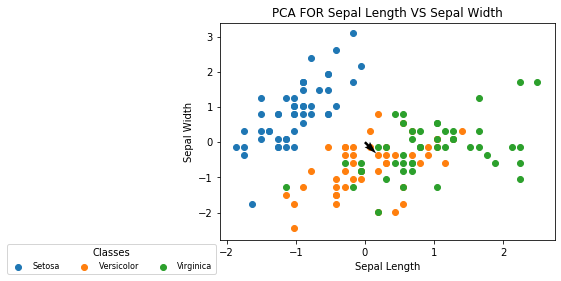

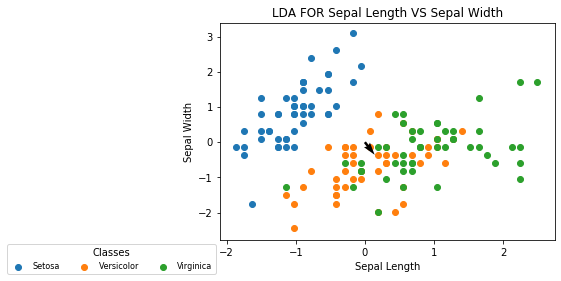

In [33]:
plt.scatter(x_std[0:49,0], x_std[0:49,1], label='Setosa')
plt.scatter(x_std[50:99,0], x_std[50:99,1], label='Versicolor')
plt.scatter(x_std[100:149, 0], x_std[100:149,1], label='Virginica')
plt.legend(numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), title="Classes")
plt.title("PCA FOR Sepal Length VS Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
origin=[0,0]
plt.quiver(*origin,*e_vectors.T[0],color=['black'],scale=21) #LD1=BLACK
plt.show()

cols = ["sepal_length", "sepal_width"]
X, y = load_data(cols, load_all=True, head=True)
lda = LDA()
eig_vecs = lda.fit(X, y)
W = eig_vecs[:, :1]

plt.scatter(x_std[0:49,0], x_std[0:49,1], label='Setosa')
plt.scatter(x_std[50:99,0], x_std[50:99,1], label='Versicolor')
plt.scatter(x_std[100:149, 0], x_std[100:149,1], label='Virginica')
plt.legend(numpoints=1, ncol=3, fontsize=8, bbox_to_anchor=(0, 0), title="Classes")
plt.title("LDA FOR Sepal Length VS Sepal Width")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
origin=[0,0]
plt.quiver(*origin,*W,color=['black'],scale=21) #PC1=BLACK
plt.show()


## Both PCA & LDA are giving the direction of optimal PC & LD resp. with a minor difference,because LDA = PCA/dim.reduction + Classification